In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
df = pd.DataFrame(pd.read_csv('train.csv'))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [5]:
train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

[(0.0, 9.0)]

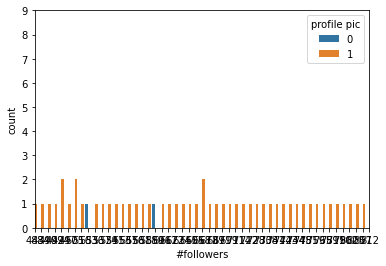

In [7]:
Q1 = sns.countplot(x = "#followers", data = train, hue = "profile pic")
Q1.set(xlim=(200, 250))
Q1.set(ylim=(0, 9))

In [8]:
grouped = df.groupby(['profile pic'])
df_new = grouped.get_group(0)
df_new

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
174,0,0.00,0,0.00,0,14,0,1,131,533,1060,0
281,0,0.00,1,0.00,0,27,0,1,16,220,323,0
288,0,0.22,1,0.00,0,0,0,0,0,90,333,1
289,0,0.38,1,0.00,0,0,0,0,0,60,31,1
290,0,0.43,1,0.00,0,0,0,1,2,271,445,1
...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0.46,1,0.00,0,0,0,1,0,332,1333,1
553,0,0.73,1,0.00,0,0,0,0,0,14,542,1
556,0,0.31,1,0.31,1,0,0,0,0,26,27,1
561,0,0.86,2,0.18,0,0,0,0,0,57,130,1


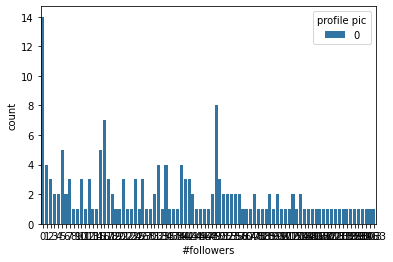

In [9]:
Q1_new = sns.countplot(x = "#followers", data = df_new, hue = "profile pic")

In [10]:
df_new.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.0,0.283198,1.116279,0.061337,0.069767,1.383721,0.0,0.296512,3.098837,102.662791,234.511628,0.988372
std,0.0,0.225613,0.516819,0.161176,0.255498,7.230003,0.0,0.458053,15.147099,371.558913,670.443691,0.107517
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.045000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,12.000000,15.750000,1.000000
50%,0.0,0.300000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,33.500000,45.500000,1.000000
75%,0.0,0.440000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,55.000000,169.500000,1.000000
max,0.0,0.890000,3.000000,1.000000,1.000000,61.000000,0.0,1.000000,141.000000,3033.000000,7272.000000,1.000000


### The maximum no. of followers possessed by a user belonging to the group of users with no profile picture.

In [22]:
print("Max number of followers possessed by user belonging to the group of users of no profile picture: ",df_new['#followers'].max())

Max number of followers possessed by user belonging to the group of users of no profile picture:  3033


### Dead accounts are characterized by a lack of substantial activity on the platform, primarily concerning the accounts with no profile picture, empty bio and 0 posts. Determine the number of dead accounts, if they exist.

In [12]:
zero_posts = df_new.groupby(['#posts']).get_group(0)
Q2 = zero_posts.groupby(['description length']).get_group(0)
print(Q2)
print("Total number of dead accounts: ",Q2.shape[0])

     profile pic  nums/length username  ...  #follows  fake
288            0                  0.22  ...       333     1
289            0                  0.38  ...        31     1
293            0                  0.31  ...        64     1
295            0                  0.00  ...       853     1
297            0                  0.00  ...         5     1
..           ...                   ...  ...       ...   ...
552            0                  0.46  ...      1333     1
553            0                  0.73  ...       542     1
556            0                  0.31  ...        27     1
561            0                  0.86  ...       130     1
562            0                  0.62  ...       347     1

[123 rows x 12 columns]
Total number of dead accounts:  123


### Determine the maximum no. of followers possessed by a user among those who have 0 posts on their respective accounts.

In [13]:
posts = df.groupby(['#posts']).get_group(0)
print('Maximum no. of followers possessed by a user among those who have 0 posts on their respective accounts:',posts['#followers'].max())

Maximum no. of followers possessed by a user among those who have 0 posts on their respective accounts: 3033


### Fake accounts have been witnessed to heavily skew the follower and following numbers. What is the ratio of number of followers  to number of following for the user with the maximum number of following?

In [14]:
df['Ratio']=df['#followers']/df['#follows']
Q5 = df.loc[df['#follows']== df['#follows'].max()]
print("The ratios of number of followers to number of following for the users with the maximum number of following are: ",Q5['Ratio'])

The ratios of number of followers to number of following for the users with the maximum number of following are:  130    0.184400
276    0.236667
Name: Ratio, dtype: float64


### Find out how expressive a person is on Instagram based on the length of their bio.
(Hint: An expressive person can be defined as the user whose description_length exceeds
the average.)

In [15]:
length = train["description length"]
print("Users with bio greater than {} can be considered expressive.".format(length.mean()))

Users with bio greater than 22.62326388888889 can be considered expressive.


In [18]:
df['Expressive'] = ['expressive' if df['description length'][i]>length.mean() else 'non expressive' for i in df.index]
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,Ratio,Expressive
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0,1.047120,expressive
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0,5.140713,expressive
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0,1.622449,non expressive
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0,0.635945,expressive
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0,1.198413,non expressive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1,0.278523,non expressive
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1,0.880000,non expressive
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1,0.283186,non expressive
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1,0.780822,non expressive


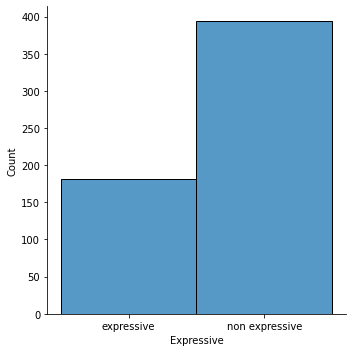

In [20]:
sns.displot(df['Expressive'], kde=False, bins=50)